# Imports

In [1]:
from imports import *
from wrangle import wrangle_zillow
import explore as ex

In [2]:
df=wrangle_zillow()

# brings in zillow df cleaned and split

Using cached csv


In [3]:
df=df[0]

# df is now train set

In [4]:
df.info()

# train set info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1278128 entries, 0 to 1278127
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype   
---  ------          --------------    -----   
 0   beds            1278128 non-null  float64 
 1   baths           1278128 non-null  float64 
 2   sqft            1278128 non-null  float64 
 3   property_value  1278128 non-null  float64 
 4   year            1278128 non-null  category
 5   taxes           1278128 non-null  float64 
 6   fips            1278128 non-null  category
dtypes: category(2), float64(5)
memory usage: 52.4 MB


# Univariate Exploration

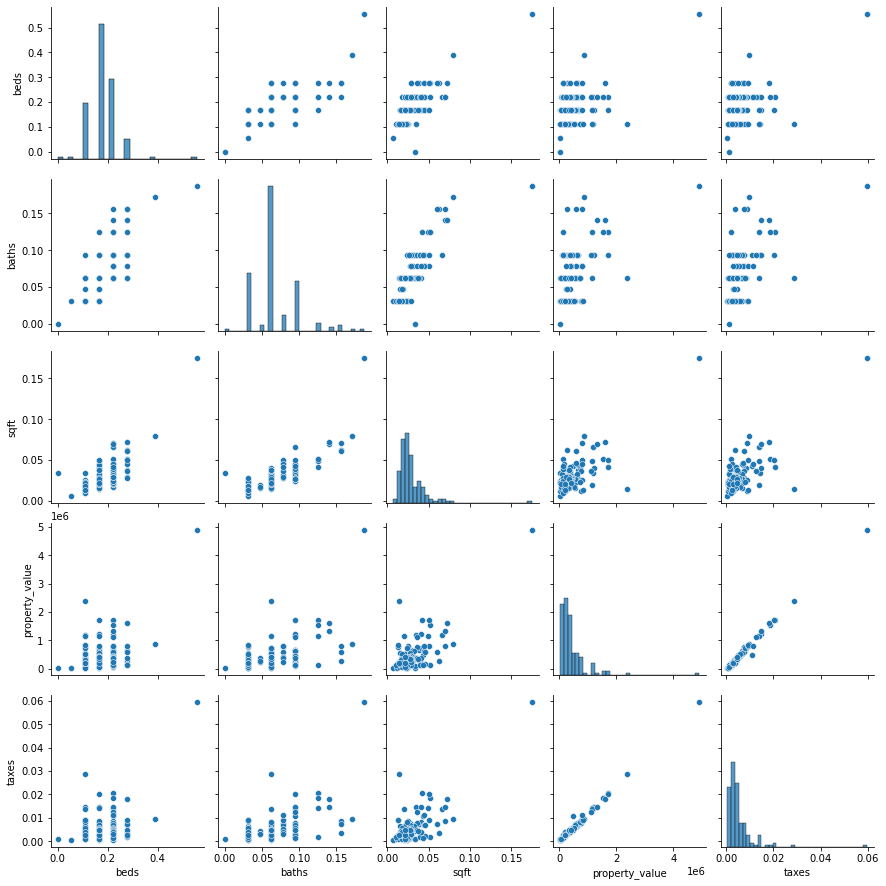

In [5]:
sns.pairplot(df.sample(150), diag_kind='hist', palette='icefire')# ,kind='reg',plot_kws={'line_kws':{'color':'red'}})

# first viz at the data

Take-aways:
- sqft looks related to taxes, property value, beds, and baths.
- 3 fips, that's a nice easy category to look at.
- beds and baths look telling but something wierd happening with outliers/ faulty data.
- average sq footage hasnt changed much over the decades
- property values and taxes very strongly correlate
- "beds, baths, sqft, property_value, year, taxes" pretty much normally distributed, some cols skew right (check for outliers)


# Bivariate Analysis

In [6]:
df.fips=df.fips.astype('category')

# change fips to 'catagory' for sns.pairplot


Hue is set to fips. I want to explore the geographic relation to sqft.

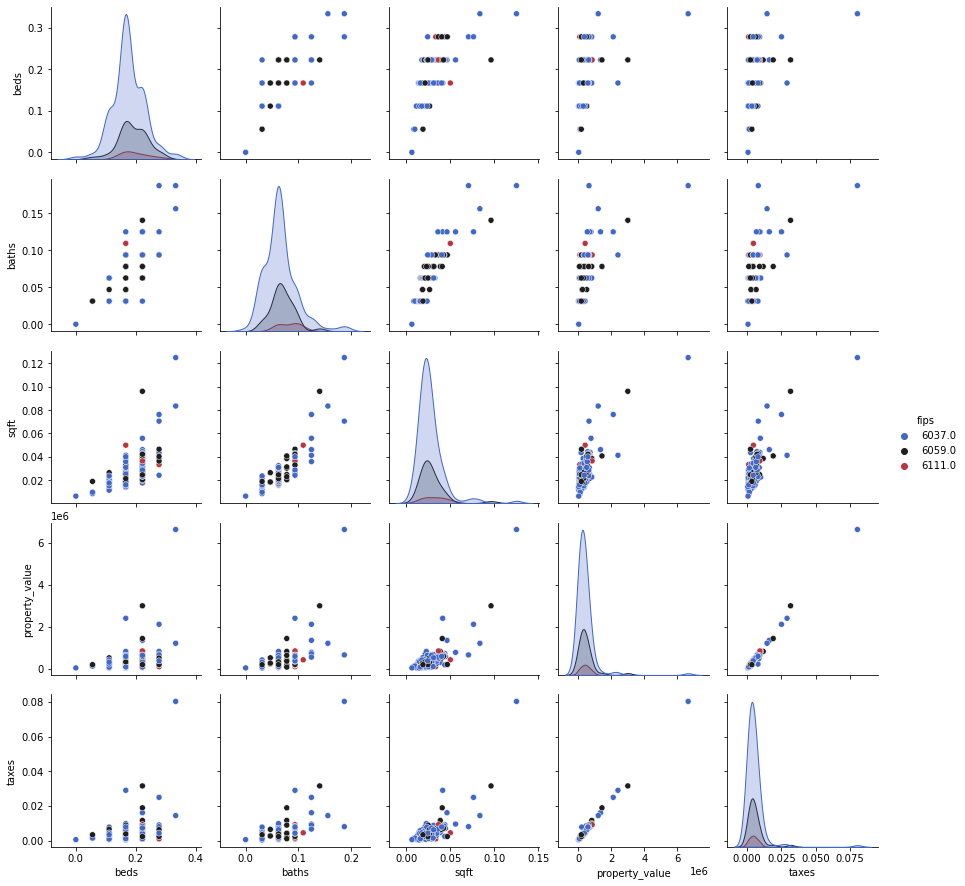

In [7]:
sns.pairplot(df.sample(150),hue='fips', diag_kind='kde', palette='icefire' ) #, plot_kws={'line_kws':{'color':'red'}})

# set hue to fips

Take-aways:
- looks like 3067 is the more popular fip

If I had more time I would write a list that pops out lmplots.

In [8]:
df.head()

# reminder what the dataframe looks like

,beds,baths,sqft,property_value,year,taxes,fips
0,0.166667,0.06250,0.024666,578000.0,1978.0,0.006661,6059.0
1,0.222222,0.06250,0.024949,196335.0,1950.0,0.002501,6037.0
2,0.166667,0.06250,0.026786,186907.0,1947.0,0.002444,6037.0
3,0.166667,0.03125,0.018668,189154.0,1946.0,0.002720,6037.0
4,0.111111,0.03125,0.015183,229747.0,1929.0,0.003044,6037.0


In [9]:
cat_cols = ['beds', 'baths', 'fips']
con_cols = ['sqft', 'property_value']

# for plotting purposes

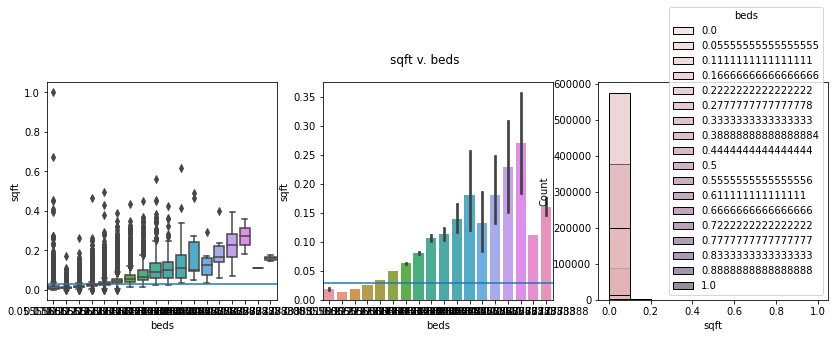

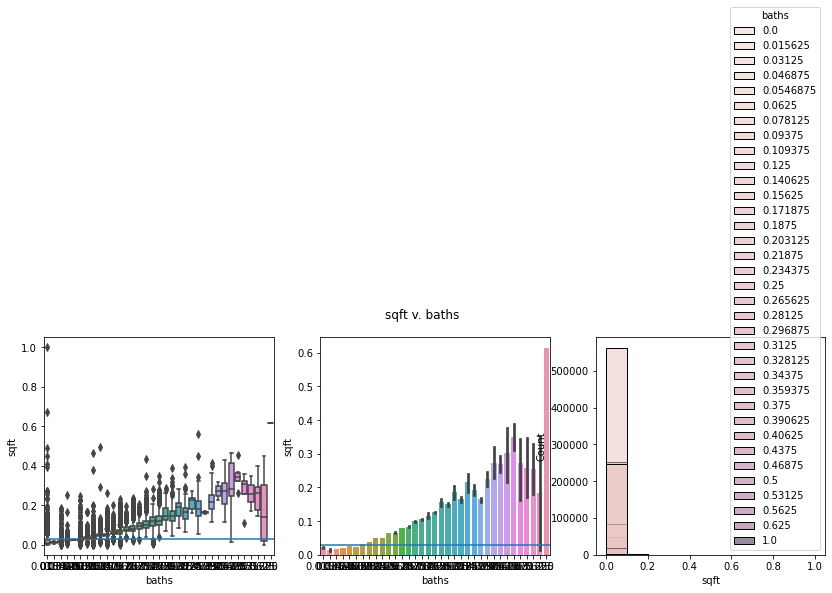

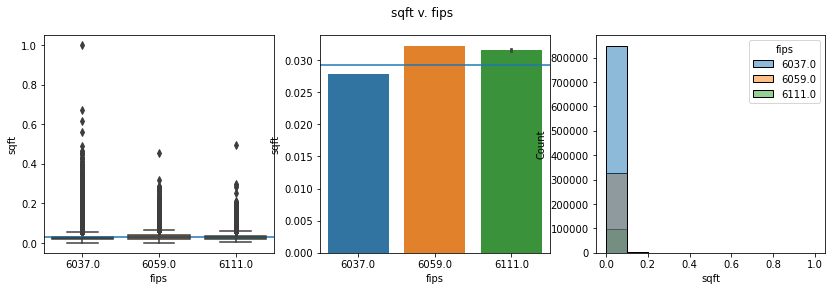

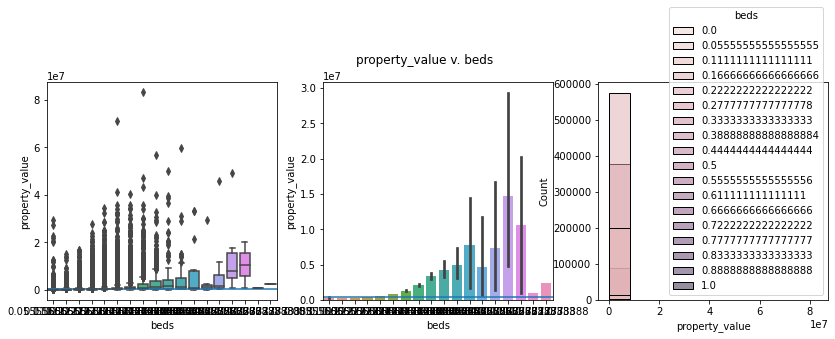

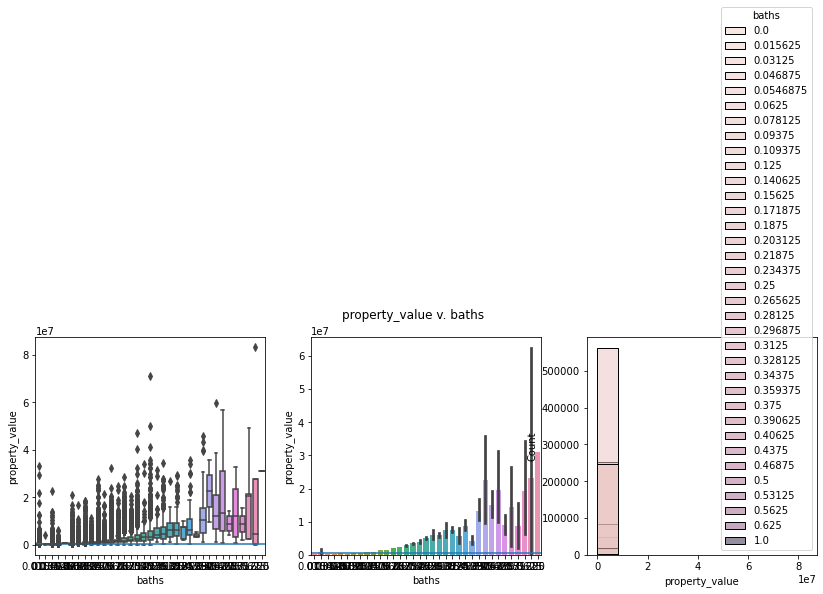

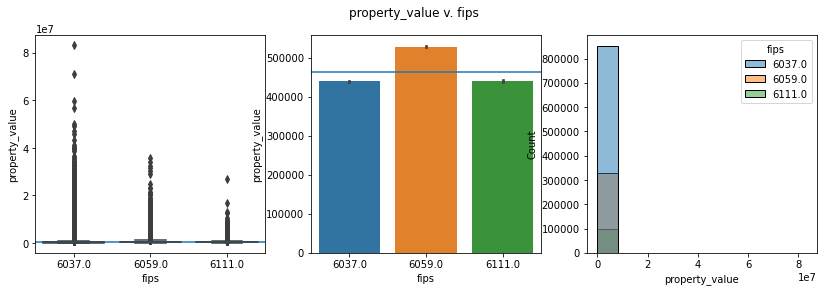

In [10]:
ex.plot_categorical_and_continuous_vars(df, cat_cols, con_cols)

We can see from the fips vs. property value that houses in the 6059 fip have a higher mean value than the others.

<AxesSubplot:xlabel='fips', ylabel='property_value'>

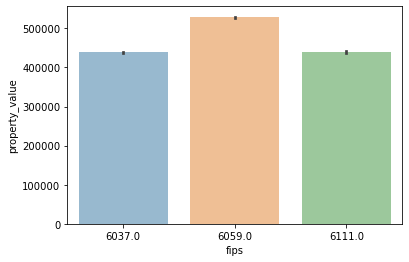

In [11]:
# bar plot. Shows mean for each category instead with CI
sns.barplot(data = df, y = 'property_value', x = 'fips', alpha=0.5)


# Multivariate Exploration

Here I want to see the realtionship between sqft and property value while I control for location (fips).

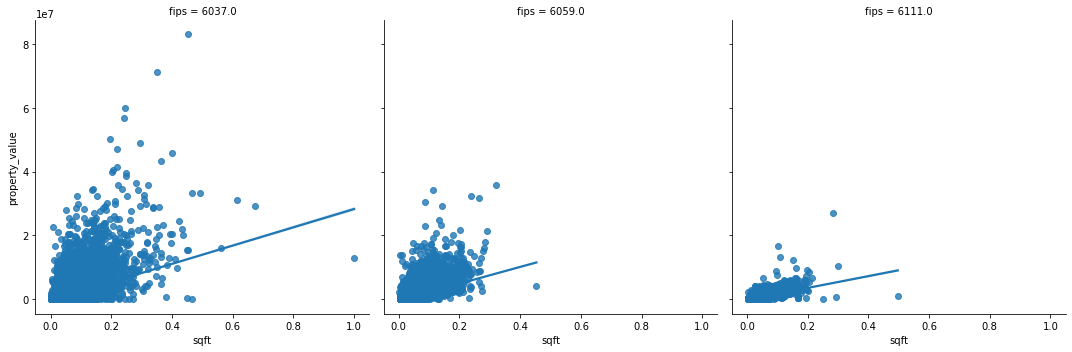

In [12]:
sns.lmplot(data=df, x='sqft', y='property_value', col='fips',)

# plot the relation between x and y and show the trendline

Whats the relationship between beds and property values?
- Hard to tell.

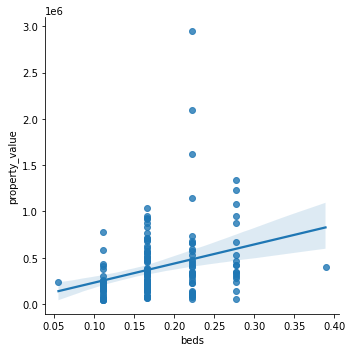

In [13]:
sns.lmplot(data=df.sample(150), x='beds', y='property_value')

# plot the relation between x and y and show the trendline

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1278128 entries, 0 to 1278127
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype   
---  ------          --------------    -----   
 0   beds            1278128 non-null  float64 
 1   baths           1278128 non-null  float64 
 2   sqft            1278128 non-null  float64 
 3   property_value  1278128 non-null  float64 
 4   year            1278128 non-null  category
 5   taxes           1278128 non-null  float64 
 6   fips            1278128 non-null  category
dtypes: category(2), float64(5)
memory usage: 52.4 MB


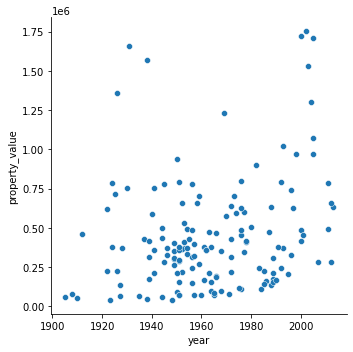

In [19]:
sns.relplot(data=df.sample(150), x='year', y='property_value')